# Ferry Transport Network

## 0 Setup environment

In [1]:
import os

import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd

In [2]:
BASE_PATH = "./data"
BOUNDARIES_FILE = os.path.join(BASE_PATH, "boundaries.gpkg")

## 1 Load town boundaries

In [3]:
gdf_boundaries = gpd.read_file(BOUNDARIES_FILE)
gdf_boundaries.head()

,town,province,geometry
0,Bacacay,Albay,"MULTIPOLYGON (((123.84193 13.3341, 123.84204 1..."
1,Camalig,Albay,"MULTIPOLYGON (((123.6559 13.06131, 123.65536 1..."
2,Daraga,Albay,"MULTIPOLYGON (((123.71487 13.03995, 123.71474 ..."
3,Guinobatan,Albay,"MULTIPOLYGON (((123.68355 13.25321, 123.67729 ..."
4,Jovellar,Albay,"MULTIPOLYGON (((123.6559 13.06131, 123.65568 1..."


## 2 Generate ferry network graph

In [4]:
graph_ferry = ox.graph_from_place(
    "Bicol Region",
    custom_filter='["route"="ferry"]',
    retain_all=True,
    simplify=False,
)

/home/ainz/Code/transport-network-analysis/.venv/lib64/python3.13/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 25 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


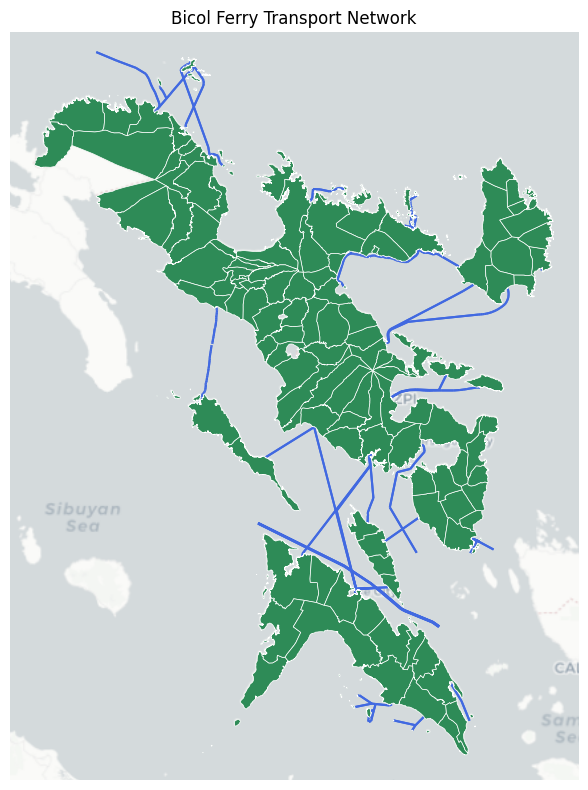

In [5]:
_, ax = plt.subplots(figsize=(8, 8))

ox.plot_graph(graph_ferry, ax=ax, node_size=0, edge_color="royalblue", edge_linewidth=1.5, show=False, close=False)

gdf_boundaries.plot(ax=ax, edgecolor="white", linewidth=0.5, facecolor="seagreen")

x_min, y_min, x_max, y_max = gdf_boundaries.total_bounds
padding = 0.1
ax.set_xlim(x_min - padding, x_max + padding)
ax.set_ylim(y_min - padding, y_max + padding)

cx.add_basemap(ax, crs=gdf_boundaries.crs, source=cx.providers.CartoDB.Positron, attribution="")

plt.title("Bicol Ferry Transport Network")
plt.tight_layout()
plt.axis("off")

filepath = os.path.join(BASE_PATH, "ferry_network.png")
plt.savefig(filepath, dpi=300, bbox_inches="tight")

plt.show()

In [6]:
edges = ox.graph_to_gdfs(graph_ferry, nodes=False, edges=True)
edges.head()

osmid  oneway  reversed       length  \
u          v          key                                              
2529987584 9926214984 0    1176854983   False      True   244.774192   
5891853236 7237771239 0     775841256   False     False    80.655939   
7237771239 7237771241 0     775841256   False     False  8737.956670   
           5891853236 0     775841256   False      True    80.655939   
7237771240 7237771241 0     775841256   False      True  9448.298881   

                                       name  ref access  \
u          v          key                                 
2529987584 9926214984 0                 NaN  NaN    NaN   
5891853236 7237771239 0    Bogo - Cataingan  NaN    NaN   
7237771239 7237771241 0    Bogo - Cataingan  NaN    NaN   
           5891853236 0    Bogo - Cataingan  NaN    NaN   
7237771240 7237771241 0    Bogo - Cataingan  NaN    NaN   

                                                                    geometry  
u          v          key                                                     
2529987584 9926214984 0    LINESTRING (123.75315 11.91981, 123.7525 11.9177)  
5891853236 7237771239 0    LINESTRING (124.00395 12.00262, 124.00469 12.0...  
7237771239 7237771241 0    LINESTRING (124.00469 12.00257, 124.04663 11.9...  
           5891853236 0    LINESTRING (124.00469 12.00257, 124.00395 12.0...  
7237771240 7237771241 0    LINESTRING (124.07959 11.85694, 124.04663 11.9...

In [7]:
nodes = ox.graph_to_gdfs(graph_ferry, nodes=True, edges=False)
nodes.head()

,y,x,street_count,geometry
osmid,,,,
2529987584,11.919806,123.753155,1,POINT (123.75315 11.91981)
5891853236,12.002620,124.003947,1,POINT (124.00395 12.00262)
7237771239,12.002567,124.004686,2,POINT (124.00469 12.00257)
7237771240,11.856936,124.079589,1,POINT (124.07959 11.85694)
7237771241,11.935548,124.046630,2,POINT (124.04663 11.93555)


## 3 Save graph into file

In [8]:
filepath = os.path.join(BASE_PATH, "ferry_network.graphml")
ox.save_graphml(graph_ferry, filepath=filepath)